In [83]:
NYC_Poverty <- read.csv("NYCgov_Poverty_Measure_Data__2018_.csv")

library(ggplot2)
library(broom)
library(dplyr)
library(stringr)
library(tidyverse)

In [84]:
head(NYC_Poverty)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,⋯,NYCgov_IncomeTax,NYCgov_Income,NYCgov_EITC,Off_Threshold,Off_Pov_Stat,NYCgov_Threshold,NYCgov_Pov_Stat,NYCgov_PovGapIndex,NYCgov_PovGap,X
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,1,95,95,31,1,0,1,0,22,⋯,33917.9858,81735.03,0,13064,2,16241.60,2,0,0,NA
2,1000033,1,53,53,29,5,0,1,0,20,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
3,1000033,2,61,53,30,5,1,1,0,21,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
4,1000058,1,152,152,68,1,0,1,0,12,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
5,1000058,2,144,152,71,1,1,1,0,16,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
6,1000058,3,110,152,6,1,10,3,3,3,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA


In [85]:
subset <- NYC_Poverty[, c("SERIALNO", "AGEP", "CIT", "SEX", "ESR", "LANX", "ENG", "MAR", "DIS", "TEN", 'FamType_PU', "WAGP_adj", "SSP_adj", "RNTP_adj", "Ethnicity", "Boro", "EducAttain", "FTPTWork", "Off_Pov_Stat", "NYCgov_Income", "NYCgov_Pov_Stat", "NYCgov_Childcare", "NYCgov_Commuting", "NYCgov_MOOP", "NYCgov_MedSpending", "NYCgov_MedPremiums", "NYCgov_HEAP", "NYCgov_WIC", "NYCgov_SNAP", "NYCgov_SchoolLunch", "NYCgov_SchoolBreakfast", "NYCgov_FICAtax", "NYCgov_IncomeTax", "NYCgov_PovGap", "NYCgov_PovGapIndex")]

In [86]:
head(subset)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_WIC,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,31,1,2,1,2,NA,5,2,2,⋯,1560.00,0,0,0,0.0,0.00,9765.242,33917.9858,0,0
2,1000033,29,5,2,1,1,1,1,2,2,⋯,9648.00,0,0,0,0.0,0.00,7750.192,16621.7209,0,0
3,1000033,30,5,1,1,1,2,1,2,2,⋯,9648.00,0,0,0,0.0,0.00,7750.192,16621.7209,0,0
4,1000058,68,1,1,6,2,NA,1,1,1,⋯,1407.36,0,0,0,612.5,306.25,0.000,-348.8956,0,0
5,1000058,71,1,2,6,2,NA,1,2,1,⋯,1407.36,0,0,0,612.5,306.25,0.000,-348.8956,0,0
6,1000058,6,1,2,NA,2,NA,5,2,1,⋯,1407.36,0,0,0,612.5,306.25,0.000,-348.8956,0,0


In [87]:
subset$SEX <- recode(subset$SEX, '1'='Male', '2'='Female')

In [88]:
subset$CIT <- recode(subset$CIT, '1'='US citizen', '2'='US citizen', '3'='US citizen', '4'='US citizen', '5'='Non citizen')

In [89]:
subset = na.omit(subset) # the entire row which contains any NA is removed 
# 2/3 of ENG are missing data, so we need to decide if we want to include ENG as a var in our subset
head(subset)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_WIC,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1000033,29,Non citizen,Female,1,1,1,1,2,2,⋯,9648.00,0,0,0,0,0,7750.192,16621.72,0,0
3,1000033,30,Non citizen,Male,1,1,2,1,2,2,⋯,9648.00,0,0,0,0,0,7750.192,16621.72,0,0
11,1000297,47,US citizen,Female,1,1,1,1,2,1,⋯,5459.76,0,0,0,0,0,12787.817,32575.16,0,0
12,1000297,48,US citizen,Male,1,1,1,1,2,1,⋯,5459.76,0,0,0,0,0,12787.817,32575.16,0,0
15,1000313,30,Non citizen,Male,1,1,1,5,2,3,⋯,6208.96,0,0,0,0,0,12787.817,37878.22,0,0
16,1000313,26,US citizen,Female,1,1,2,5,2,3,⋯,6208.96,0,0,0,0,0,12787.817,37878.22,0,0


In [90]:
nrow(subset)

[1] 27040

In [91]:
eth.name = c('Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian',
             'Hispanic','Others')
subset$Ethnicity = factor(subset$Ethnicity,levels = 1:5,labels = eth.name)

In [92]:
subset$NYCgov_Pov_Stat <- recode(subset$NYCgov_Pov_Stat, '1'='In poverty','2'='Not in poverty')

Warning message:
“Removed 24353 rows containing non-finite values (stat_boxplot).”


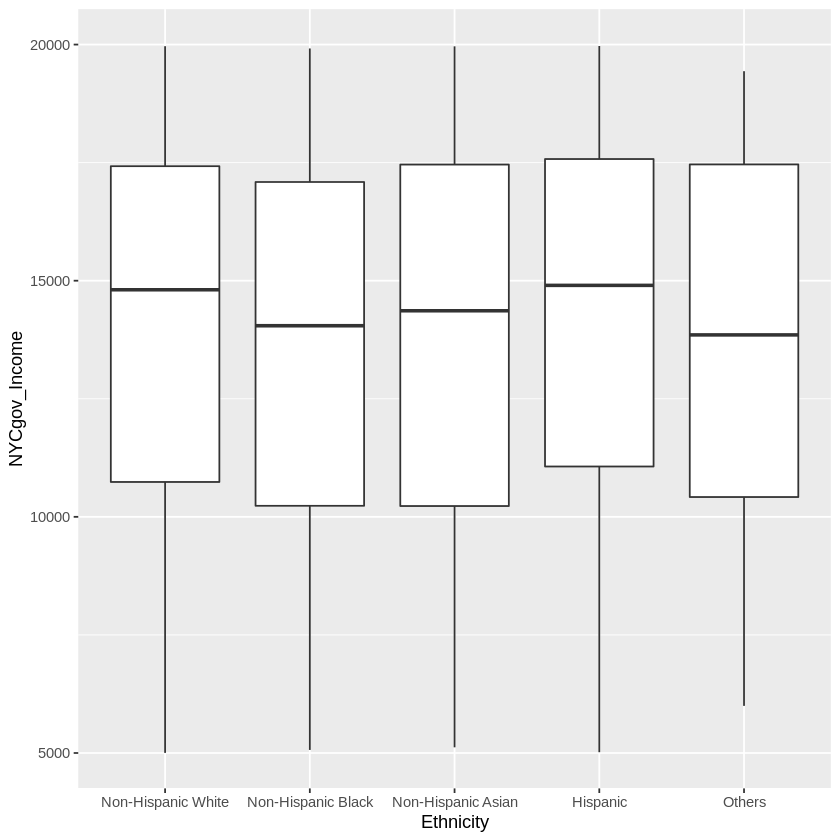

In [93]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_Income))+geom_boxplot()+ylim(5000, 20000)

In [94]:
opar = par(no.readonly =TRUE)
par(mar=c(5,1.8,0.3,1),pin=c(4.8,2.5))
Edu.name = c('less than HS','High School','Some College','Bachelors or higher')
subset$EducAttain = factor(subset$EducAttain,labels = Edu.name)
edu.t = prop.table(table(subset$Ethnicity,subset$EducAttain),1)
edu.t

                    
                     less than HS High School Some College Bachelors or higher
  Non-Hispanic White    0.1423879   0.2164559    0.1829529           0.4582033
  Non-Hispanic Black    0.1966006   0.2424929    0.2878187           0.2730878
  Non-Hispanic Asian    0.2473318   0.1882601    0.1701415           0.3942666
  Hispanic              0.3126758   0.2694543    0.2449841           0.1728858
  Others                0.1883117   0.1796537    0.1904762           0.4415584

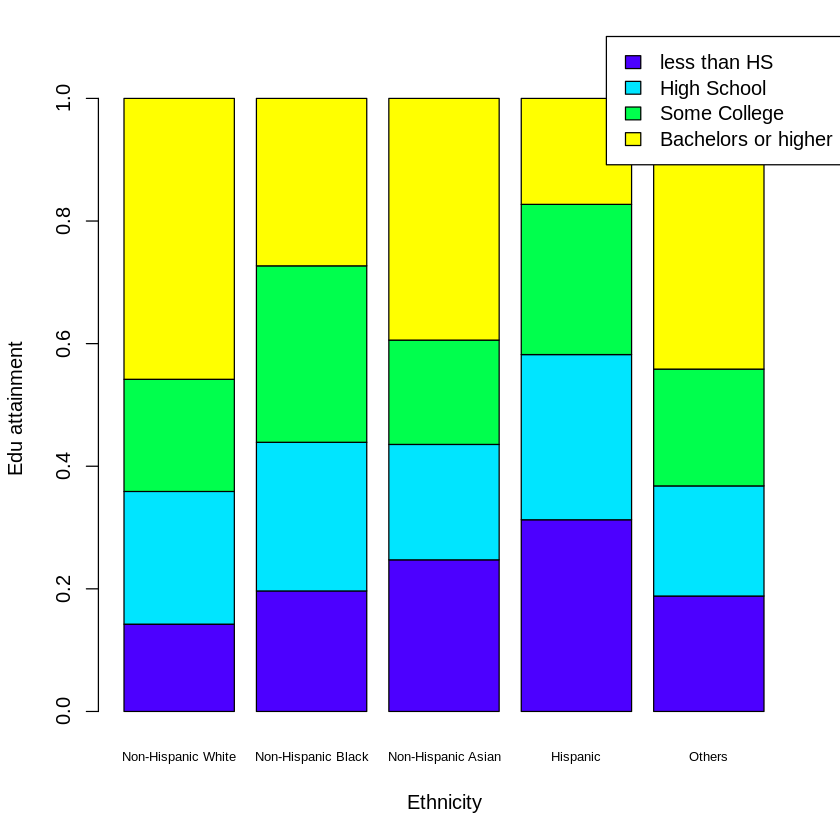

In [95]:
barplot(t(edu.t),col = topo.colors(4),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Edu attainment')
legend(x='topright',legend = rownames(t(edu.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

In [96]:
subset$Boro <- recode(subset$Boro, '1'='Bronx','2'='Brooklyn', '3'='Manhattan', '4'='Queens', '5'='Staten Island')
#subset$Boro

In [97]:
subset$LANX <- recode(subset$LANX, '1'='Speaks other language','2'='Speaks only English')
#subset$LANX

In [98]:
subset$ENG <- recode(subset$ENG, '1'='Very well','2'='Well', '3'='Not well', '4'='Not at all')
#subset$ENG

In [99]:
subset$MAR <- recode(subset$MAR, '1'='Married','2'='Widowed', '3'='Divorced', '4'='Separated', '5'='Never married or under 15')
#subset$MAR

In [100]:
subset$DIS <- recode(subset$DIS, '1'='Disability','2'='No disability')
#subset$DIS

In [101]:
subset$TEN <- recode(subset$TEN, '1'='Owned with mortgage or loan','2'='Owned free and clear', '3'='Rented', '4'='Occupied without payment of rent')

In [102]:
subset$FamType_PU <- recode(subset$FamType_PU, '1'='Husband/Wife+child ','2'='Husband/Wife no child ', '3'='Single Male+child', '4'='Single Female+child', '5'='Male unit head, no child','6'='Female unit head, no child','7'='Unrelated Indiv w/others','8'='Unrelated Indiv Alone')

In [103]:
subset$FTPTWork <- recode(subset$FTPTWork, '1'='Full Time Year Round','2'='Part time','3'='No work')